## Libraies 

In [4]:
import snowflake.connector
import pandas as pd, snowflake.connector, re
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import pandas as pd 
import requests
import json 
from forecastiopy import *
from datetime import date, timedelta, datetime
import datetime
#from datetime import datetime
#https://dwgeek.com/export-snowflake-table-using-python-example.html/

## Importing Data 

### Weather data

In [5]:
import pandas as pd 
import requests
import json 
from forecastiopy import *
from datetime import date, timedelta, datetime
import datetime\

#input your own key here

key = 'xxxxxxxxx'
dd=pd.DataFrame()

#city is chula vista in this case
city = [32.6060, -117.0441]
start = datetime.datetime(2018, 1, 1)


for day in range(0,732):
    fio = ForecastIO.ForecastIO(key,
                        units=ForecastIO.ForecastIO.UNITS_SI,
                        lang=ForecastIO.ForecastIO.LANG_ENGLISH,
                        latitude=city[0], 
                        longitude=city[1],
                        time=(start+datetime.timedelta(day)).isoformat())
    #print(fio.timezone)
    #get hourly data
    hourly= FIOHourly.FIOHourly(fio)
    #transform dictionary into a df
    hourly=pd.DataFrame.from_dict(hourly.data)
    #append every hourly data into dataframe
    dd=dd.append(hourly)

In [6]:
df =pd.read_csv(r"C:\OA\4-GF Weather & Sales\Darksky Data\weather_hourly.csv")
df=df.drop(columns=['Unnamed: 0'])

In [7]:


#convert unix to date  
df['time_read']=pd.to_datetime(df['time'], unit='s')

#seperate time and date into two columns
df['date'] = [d.date() for d in df['time_read']]
df['time_2'] = [d.time() for d in df['time_read']]


#reorder columsn: put time in the begining
cols = df.columns.tolist()
cols = ['date','time_2','time_read','time','apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'ozone', 'precipIntensity', 'precipProbability', 'precipType',
       'pressure', 'summary', 'temperature',  'uvIndex', 'visibility',
       'windBearing', 'windGust', 'windSpeed']
df = df[cols]



In [8]:
df.head(24)

,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
0,2018-01-01,08:00:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,0.0,NaN,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72
1,2018-01-01,09:00:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04
2,2018-01-01,10:00:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20
3,2018-01-01,11:00:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,0.0,NaN,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11
4,2018-01-01,12:00:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,0.0,NaN,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22
5,2018-01-01,13:00:00,2018-01-01 13:00:00,1514811600,7.96,1.00,5.43,0.79,fog,NaN,...,0.0,NaN,1020.6,Foggy,8.80,0.0,2.111,44,2.48,1.82
6,2018-01-01,14:00:00,2018-01-01 14:00:00,1514815200,8.94,1.00,5.04,0.77,fog,NaN,...,0.0,NaN,1020.8,Foggy,8.94,0.0,1.940,56,2.12,1.18
7,2018-01-01,15:00:00,2018-01-01 15:00:00,1514818800,7.96,0.33,4.59,0.79,partly-cloudy-day,NaN,...,0.0,NaN,1021.2,Partly Cloudy,7.96,0.0,4.743,48,0.67,0.51
8,2018-01-01,16:00:00,2018-01-01 16:00:00,1514822400,9.88,0.65,5.16,0.72,partly-cloudy-day,NaN,...,0.0,NaN,1021.5,Mostly Cloudy,9.88,0.0,4.364,94,1.00,0.88
9,2018-01-01,17:00:00,2018-01-01 17:00:00,1514826000,12.40,0.90,6.07,0.65,fog,NaN,...,0.0,NaN,1021.8,Foggy,12.40,1.0,3.079,73,0.67,0.54


df = df[:-2]

#from snowflake
# Gets the version
ctx = create_engine(URL(
                user='xx',
                password='xx',
                role='xxx',
                account='xx',
                warehouse='xxx',
                database='xxx',
                schema='xx'
    ))
 

temp = pd.read_sql_query(" select * from table WHERE (CALENDAR_DATE BETWEEN '2018-01-01'and '2019-12-31' and _STORE_NAME = 'xxxx') ORDER BY CALENDAR_DATE", ctx)

In [9]:
dp=pd.read_csv(r'C:\OA\4-GF Weather & Sales\daypart\sales_hourly.csv')
dp=dp.drop(columns=['Unnamed: 0'])

C:\Users\yvonn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dp=temp

In [10]:
dp.head()

,guest_type,meal_type,calendar_date,calendar_datetime,fiscal_week,fiscal_period,first_day_period,fiscal_period_py,first_day_period_py,fiscal_min_week_date,...,price_modifier_type,program_group,price_modifier_isactive,_store_name,do,vp_name,_zip_code,_city,region,_state
0,Senior,Lunch,1/3/2018 0:00,1/3/2018 14:45,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,Senior Special,NaN,True,City,do,vp,0,City,Region,State
1,Full Pay,Lunch,1/3/2018 0:00,1/3/2018 12:15,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,NaN,NaN,True,City,do,vp,0,City,Region,State
2,Club Veg,Dinner,1/3/2018 0:00,1/3/2018 18:15,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,$ Dinner $9.99,Discounted Price,True,City,do,vp,0,City,Region,State
3,Club Veg,Dinner,1/3/2018 0:00,1/3/2018 18:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,2 for $ Dinner Combo $25.0,Discounted Price,True,City,do,vp,0,City,Region,State
4,Club Veg,Lunch,1/3/2018 0:00,1/3/2018 15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,$ Lunch Combo $9.99,Discounted Price,True,City,do,vp,0,City,Region,State


In [11]:
dp.shape

(558082, 37)

In [12]:
dp.columns


Index(['guest_type', 'meal_type', 'calendar_date', 'calendar_datetime',
       'fiscal_week', 'fiscal_period', 'first_day_period', 'fiscal_period_py',
       'first_day_period_py', 'fiscal_min_week_date', 'fiscal_max_week_date',
       'previous_fiscal_min_week_date', 'previous_fiscal_max_week_date',
       'guests', 'sales', 'bev_count', 'discounts', 'gross_sales', 'quantity',
       'transcount', 'item_name', 'main_group', 'menu_class', 'sub_group',
       'sub_sub_group', 'togo_item_type', 'sale_type', 'price_modifier_type',
       'program_group', 'price_modifier_isactive', '_store_name', 'do',
       'vp_name', '_zip_code', '_city', 'region', '_state'],
      dtype='object')

## Create Time Column 

### DP

In [13]:
dp['calendar_datetime'] =pd.to_datetime(dp['calendar_datetime'])
dp['time']=[datetime.datetime.time(d) for d in dp['calendar_datetime']] 
dp.head()
dp['time']=dp['calendar_datetime'].dt.strftime('%H:%M')


In [14]:
dp.head()

,guest_type,meal_type,calendar_date,calendar_datetime,fiscal_week,fiscal_period,first_day_period,fiscal_period_py,first_day_period_py,fiscal_min_week_date,...,program_group,price_modifier_isactive,_store_name,do,vp_name,_zip_code,_city,region,_state,time
0,Senior,Lunch,1/3/2018 0:00,2018-01-03 14:45:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,NaN,True,City,do,vp,0,City,Region,State,14:45
1,Full Pay,Lunch,1/3/2018 0:00,2018-01-03 12:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,NaN,True,City,do,vp,0,City,Region,State,12:15
2,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,Discounted Price,True,City,do,vp,0,City,Region,State,18:15
3,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,Discounted Price,True,City,do,vp,0,City,Region,State,18:00
4,Club Veg,Lunch,1/3/2018 0:00,2018-01-03 15:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,Discounted Price,True,City,do,vp,0,City,Region,State,15:00


In [15]:
dp[dp['calendar_datetime']=="2019-01-01 16:15:00"]

,guest_type,meal_type,calendar_date,calendar_datetime,fiscal_week,fiscal_period,first_day_period,fiscal_period_py,first_day_period_py,fiscal_min_week_date,...,program_group,price_modifier_isactive,_store_name,do,vp_name,_zip_code,_city,region,_state,time
282203,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282220,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282270,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282316,Senior,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282322,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282334,Print,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,NaN,City,do,vp,0,City,Region,State,16:15
282375,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282436,Full Pay,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15
282440,Print,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,NaN,City,do,vp,0,City,Region,State,16:15
282470,Senior,Dinner,1/1/2019 0:00,2019-01-01 16:15:00,WK52,P12,11/28/2018,P01,1/7/2017,12/26/2018,...,NaN,True,City,do,vp,0,City,Region,State,16:15


#### Create time that matches with darksky's time

In [16]:
dp.loc[dp.time == '09:00', 'darksky_time'] = "09:00"
dp.loc[dp.time == '09:30', 'darksky_time'] = "09:00"
dp.loc[dp.time == '09:45', 'darksky_time'] = "09:00"

dp.loc[dp.time == '10:00', 'darksky_time'] = "10:00"
dp.loc[dp.time == '10:15', 'darksky_time'] = "10:00"
dp.loc[dp.time == '10:30', 'darksky_time'] = "10:00"
dp.loc[dp.time == '10:45', 'darksky_time'] = "10:00"

dp.loc[dp.time == '11:00', 'darksky_time'] = "11:00"
dp.loc[dp.time == '11:15', 'darksky_time'] = "11:00"
dp.loc[dp.time == '11:30', 'darksky_time'] = "11:00"
dp.loc[dp.time == '11:45', 'darksky_time'] = "11:00"


dp.loc[dp.time == '12:00', 'darksky_time'] = "12:00"
dp.loc[dp.time == '12:15', 'darksky_time'] = "12:00"
dp.loc[dp.time == '12:30', 'darksky_time'] = "12:00"
dp.loc[dp.time == '12:45', 'darksky_time'] = "12:00"

dp.loc[dp.time == '13:00', 'darksky_time'] = "13:00"
dp.loc[dp.time == '13:15', 'darksky_time'] = "13:00"
dp.loc[dp.time == '13:30', 'darksky_time'] = "13:00"
dp.loc[dp.time == '13:45', 'darksky_time'] = "13:00"



dp.loc[dp.time == '14:00', 'darksky_time'] = "14:00"
dp.loc[dp.time == '14:15', 'darksky_time'] = "14:00"
dp.loc[dp.time == '14:30', 'darksky_time'] = "14:00"
dp.loc[dp.time == '14:45', 'darksky_time'] = "14:00"

dp.loc[dp.time == '15:00', 'darksky_time'] = "15:00"
dp.loc[dp.time == '15:15', 'darksky_time'] = "15:00"
dp.loc[dp.time == '15:30', 'darksky_time'] = "15:00"
dp.loc[dp.time == '15:45', 'darksky_time'] = "15:00"

dp.loc[dp.time == '16:00', 'darksky_time'] = "16:00"
dp.loc[dp.time == '16:15', 'darksky_time'] = "16:00"
dp.loc[dp.time == '16:30', 'darksky_time'] = "16:00"
dp.loc[dp.time == '16:45', 'darksky_time'] = "16:00"

dp.loc[dp.time == '17:00', 'darksky_time'] = "17:00"
dp.loc[dp.time == '17:15', 'darksky_time'] = "17:00"
dp.loc[dp.time == '17:30', 'darksky_time'] = "17:00"
dp.loc[dp.time == '17:45', 'darksky_time'] = "17:00"



#6-8
dp.loc[dp.time == '18:00','darksky_time'] = "18:00"
dp.loc[dp.time == '18:15', 'darksky_time'] = "18:00"
dp.loc[dp.time == '18:30', 'darksky_time'] = "18:00"
dp.loc[dp.time == '18:45', 'darksky_time'] = "18:00"

dp.loc[dp.time == '19:00', 'darksky_time'] = "19:00"
dp.loc[dp.time == '19:15', 'darksky_time'] = "19:00"
dp.loc[dp.time == '19:30', 'darksky_time'] = "19:00"
dp.loc[dp.time == '19:45', 'darksky_time'] = "19:00"

dp.loc[dp.time == '20:00', 'darksky_time'] = "20:00"
dp.loc[dp.time == '20:15', 'darksky_time'] = "20:00"
dp.loc[dp.time == '20:30', 'darksky_time'] = "20:00"
dp.loc[dp.time == '20:45', 'darksky_time'] = "20:00"


dp.loc[dp.time == '21:00', 'darksky_time'] = "21:00"
dp.loc[dp.time == '21:15','darksky_time'] = "21:00"
dp.loc[dp.time == '21:30', 'darksky_time'] = "21:00"
dp.loc[dp.time == '21:45', 'darksky_time'] = "21:00"

dp.loc[dp.time == '22:00', 'darksky_time'] = "22:00"


dp.head()




,guest_type,meal_type,calendar_date,calendar_datetime,fiscal_week,fiscal_period,first_day_period,fiscal_period_py,first_day_period_py,fiscal_min_week_date,...,price_modifier_isactive,_store_name,do,vp_name,_zip_code,_city,region,_state,time,darksky_time
0,Senior,Lunch,1/3/2018 0:00,2018-01-03 14:45:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,14:45,14:00
1,Full Pay,Lunch,1/3/2018 0:00,2018-01-03 12:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,12:15,12:00
2,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,18:15,18:00
3,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,18:00,18:00
4,Club Veg,Lunch,1/3/2018 0:00,2018-01-03 15:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,15:00,15:00


#### Create time group based on the time columns

In [17]:
dp['time'].value_counts()

18:45    16201
18:15    16124
18:30    16004
18:00    15939
17:45    15826
19:00    15661
17:30    15442
19:15    15373
16:30    15048
16:45    14952
17:15    14831
16:15    14782
15:45    14688
17:00    14676
19:30    14520
16:00    14463
15:30    14420
12:30    14254
13:30    14093
13:00    14079
13:15    13954
12:45    13906
15:15    13856
13:45    13647
12:15    13545
14:00    13415
14:15    13372
15:00    13352
14:45    13338
19:45    13302
14:30    13266
12:00    12802
11:45    12142
20:00    12090
11:30    11244
20:15    10113
11:15     9960
20:30     8000
11:00     7793
10:45     7680
20:45     5266
21:00     3184
10:15     2095
10:30     2017
21:15     1687
21:30      965
21:45      449
22:00      160
00:00       43
22:15       30
09:45        7
10:00        6
09:30        5
22:45        4
22:30        3
09:00        3
23:45        2
23:30        1
23:00        1
23:15        1
Name: time, dtype: int64

#8-12am
dp.loc[dp.time == '09:30', 'time_period'] = "Morning"
dp.loc[dp.time == '09:45', 'time_period'] = "Morning"
dp.loc[dp.time == '10:00', 'time_period'] = "Morning"
dp.loc[dp.time == '10:15', 'time_period'] = "Morning"
dp.loc[dp.time == '10:30', 'time_period'] = "Morning"
dp.loc[dp.time == '10:45', 'time_period'] = "Morning"
dp.loc[dp.time == '11:00', 'time_period'] = "Morning"
dp.loc[dp.time == '11:15', 'time_period'] = "Morning"
dp.loc[dp.time == '11:30', 'time_period'] = "Morning"
dp.loc[dp.time == '11:45', 'time_period'] = "Morning"


#12-2pm
dp.loc[dp.time == '12:00', 'time_period'] = "Lunch"
dp.loc[dp.time == '12:15', 'time_period'] = "Lunch"
dp.loc[dp.time == '12:30', 'time_period'] = "Lunch"
dp.loc[dp.time == '12:45', 'time_period'] = "Lunch"
dp.loc[dp.time == '13:00', 'time_period'] = "Lunch"
dp.loc[dp.time == '13:15', 'time_period'] = "Lunch"
dp.loc[dp.time == '13:30', 'time_period'] = "Lunch"
dp.loc[dp.time == '13:45', 'time_period'] = "Lunch"
dp.loc[dp.time == '14:00', 'time_period'] = "Lunch"




#2-6
dp.loc[dp.time == '14:15', 'time_period'] = "Afternoon"
dp.loc[dp.time == '14:30', 'time_period'] = "Afternoon"
dp.loc[dp.time == '14:45', 'time_period'] = "Afternoon"
dp.loc[dp.time == '15:00', 'time_period'] = "Afternoon"
dp.loc[dp.time == '15:15', 'time_period'] = "Afternoon"
dp.loc[dp.time == '15:30', 'time_period'] = "Afternoon"
dp.loc[dp.time == '15:45', 'time_period'] = "Afternoon"
dp.loc[dp.time == '16:00', 'time_period'] = "Afternoon"
dp.loc[dp.time == '16:15', 'time_period'] = "Afternoon"
dp.loc[dp.time == '16:30', 'time_period'] = "Afternoon"
dp.loc[dp.time == '16:45', 'time_period'] = "Afternoon"
dp.loc[dp.time == '17:00', 'time_period'] = "Afternoon"
dp.loc[dp.time == '17:15', 'time_period'] = "Afternoon"
dp.loc[dp.time == '17:30', 'time_period'] = "Afternoon"
dp.loc[dp.time == '17:45', 'time_period'] = "Afternoon"



#6-8
dp.loc[dp.time == '18:00', 'time_period'] = "Dinner"
dp.loc[dp.time == '18:15', 'time_period'] = "Dinner"
dp.loc[dp.time == '18:30', 'time_period'] = "Dinner"
dp.loc[dp.time == '18:45', 'time_period'] = "Dinner"
dp.loc[dp.time == '19:00', 'time_period'] = "Dinner"
dp.loc[dp.time == '19:15', 'time_period'] = "Dinner"
dp.loc[dp.time == '19:30', 'time_period'] = "Dinner"
dp.loc[dp.time == '19:45', 'time_period'] = "Dinner"
dp.loc[dp.time == '20:00', 'time_period'] = "Dinner"

#8-10
dp.loc[dp.time == '20:15', 'time_period'] = "Night"
dp.loc[dp.time == '20:30', 'time_period'] = "Night"
dp.loc[dp.time == '20:45', 'time_period'] = "Night"
dp.loc[dp.time == '21:00', 'time_period'] = "Night"
dp.loc[dp.time == '21:15', 'time_period'] = "Night"
dp.loc[dp.time == '21:30', 'time_period'] = "Night"
dp.loc[dp.time == '21:45', 'time_period'] = "Night"
dp.loc[dp.time == '22:00', 'time_period'] = "Night"


dp.head(24)




dp['date']=pd.to_datetime(dp.date, dayfirst=True)
dp['day']=dp['date'].dt.dayofweek

#### Group by Calendar Date and time period

In [18]:
dp.head()

,guest_type,meal_type,calendar_date,calendar_datetime,fiscal_week,fiscal_period,first_day_period,fiscal_period_py,first_day_period_py,fiscal_min_week_date,...,price_modifier_isactive,_store_name,do,vp_name,_zip_code,_city,region,_state,time,darksky_time
0,Senior,Lunch,1/3/2018 0:00,2018-01-03 14:45:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,14:45,14:00
1,Full Pay,Lunch,1/3/2018 0:00,2018-01-03 12:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,12:15,12:00
2,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:15:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,18:15,18:00
3,Club Veg,Dinner,1/3/2018 0:00,2018-01-03 18:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,18:00,18:00
4,Club Veg,Lunch,1/3/2018 0:00,2018-01-03 15:00:00,WK01,P01,1/3/2018,P01,1/7/2017,1/3/2018,...,True,City,do,vp,0,City,Region,State,15:00,15:00


In [19]:
#dp2=dp.groupby(['CALENDAR_DATE','_STORE_NAME','_ZIP_CODE', '_CITY', 'REGION', '_STATE','time_period'],as_index=False)[['GUESTS','SALES','GROSS_SALES']].sum()

dp2=dp.groupby(['calendar_date','_store_name','_zip_code', '_city', 'region', '_state','darksky_time'],as_index=False)[['guests','sales','gross_sales']].sum()
dp2.head(24)

,calendar_date,_store_name,_zip_code,_city,region,_state,darksky_time,guests,sales,gross_sales
0,1/1/2019 0:00,City,0,City,Region,State,10:00,1.00,13.26,13.26
1,1/1/2019 0:00,City,0,City,Region,State,11:00,23.50,237.27,300.13
2,1/1/2019 0:00,City,0,City,Region,State,12:00,53.50,512.62,610.38
3,1/1/2019 0:00,City,0,City,Region,State,13:00,109.75,1104.12,1349.29
4,1/1/2019 0:00,City,0,City,Region,State,14:00,95.25,972.85,1165.44
5,1/1/2019 0:00,City,0,City,Region,State,15:00,100.50,982.67,1233.33
6,1/1/2019 0:00,City,0,City,Region,State,16:00,99.50,1149.16,1353.30
7,1/1/2019 0:00,City,0,City,Region,State,17:00,123.00,1444.26,1800.89
8,1/1/2019 0:00,City,0,City,Region,State,18:00,91.25,1099.73,1320.89
9,1/1/2019 0:00,City,0,City,Region,State,19:00,49.25,598.91,685.88


##### create day of the week

In [20]:
dp2 = dp2.rename(columns={'calendar_date': 'date'})


In [21]:
dp2['date']=pd.to_datetime(dp2.date, dayfirst=True)
dp2['day']=dp2['date'].dt.dayofweek

In [22]:
dp2.loc[dp2.day == 0, 'day_str'] = "Monday"
dp2.loc[dp2.day == 1, 'day_str'] = "Tueday"
dp2.loc[dp2.day == 2, 'day_str'] = "Wednesday"
dp2.loc[dp2.day == 3, 'day_str'] = "Thursday"
dp2.loc[dp2.day == 4, 'day_str'] = "Friday"
dp2.loc[dp2.day == 5, 'day_str'] = "Saturday"
dp2.loc[dp2.day == 6, 'day_str'] = "Sunday"


In [23]:
dp2.head()

,date,_store_name,_zip_code,_city,region,_state,darksky_time,guests,sales,gross_sales,day,day_str
0,2019-01-01,City,0,City,Region,State,10:00,1.00,13.26,13.26,1,Tueday
1,2019-01-01,City,0,City,Region,State,11:00,23.50,237.27,300.13,1,Tueday
2,2019-01-01,City,0,City,Region,State,12:00,53.50,512.62,610.38,1,Tueday
3,2019-01-01,City,0,City,Region,State,13:00,109.75,1104.12,1349.29,1,Tueday
4,2019-01-01,City,0,City,Region,State,14:00,95.25,972.85,1165.44,1,Tueday


### Create Time columns  for darksky

In [24]:
df.head()

,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
0,2018-01-01,08:00:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,0.0,NaN,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72
1,2018-01-01,09:00:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04
2,2018-01-01,10:00:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20
3,2018-01-01,11:00:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,0.0,NaN,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11
4,2018-01-01,12:00:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,0.0,NaN,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22


In [25]:
df['time_read'] =pd.to_datetime(df['time_read'])
#df['time_2']=[datetime.datetime.time(d) for d in df['time_read']] 
df['time_2']=df['time_read'].dt.strftime('%H:%M')
df.head()

,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
0,2018-01-01,08:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,0.0,NaN,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72
1,2018-01-01,09:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04
2,2018-01-01,10:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,0.0,NaN,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20
3,2018-01-01,11:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,0.0,NaN,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11
4,2018-01-01,12:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,0.0,NaN,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22


In [26]:
df['time_2'].value_counts()

13:00    732
18:00    732
22:00    732
20:00    732
19:00    732
05:00    732
01:00    732
15:00    732
03:00    732
11:00    732
12:00    732
23:00    732
07:00    732
04:00    732
09:00    732
08:00    732
14:00    732
06:00    732
00:00    732
02:00    732
17:00    731
21:00    731
10:00    731
16:00    731
Name: time_2, dtype: int64

In [27]:
#8-12am
df.loc[df.time_2 == '07:00', 'time_period'] = "Morning"
df.loc[df.time_2 == '08:00', 'time_period'] = "Morning"
df.loc[df.time_2 == '09:00', 'time_period'] = "Morning"
df.loc[df.time_2 == '10:00', 'time_period'] = "Morning"
df.loc[df.time_2 == '11:00', 'time_period'] = "Morning"



#12-2pm
df.loc[df.time_2 == '12:00', 'time_period'] = "Lunch"
df.loc[df.time_2 == '13:00', 'time_period'] = "Lunch"
df.loc[df.time_2 == '14:00', 'time_period'] = "Lunch"


#2-6
df.loc[df.time_2 == '15:00', 'time_period'] = "Afternoon"
df.loc[df.time_2 == '16:00', 'time_period'] = "Afternoon"
df.loc[df.time_2 == '17:00', 'time_period'] = "Afternoon"


#6-8
df.loc[df.time_2 == '18:00', 'time_period'] = "Dinner"
df.loc[df.time_2 == '19:00', 'time_period'] = "Dinner"
df.loc[df.time_2 == '20:00', 'time_period'] = "Dinner"

#8-10
df.loc[df.time_2 == '21:00', 'time_period'] = "Night"
df.loc[df.time_2 == '22:00', 'time_period'] = "Night"


df.head()




,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period
0,2018-01-01,08:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,NaN,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72,Morning
1,2018-01-01,09:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,NaN,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04,Morning
2,2018-01-01,10:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,NaN,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20,Morning
3,2018-01-01,11:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,NaN,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11,Morning
4,2018-01-01,12:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,NaN,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22,Lunch


#### Group by Calendar Date and time period

In [28]:
df.columns

Index(['date', 'time_2', 'time_read', 'time', 'apparentTemperature',
       'cloudCover', 'dewPoint', 'humidity', 'icon', 'ozone',
       'precipIntensity', 'precipProbability', 'precipType', 'pressure',
       'summary', 'temperature', 'uvIndex', 'visibility', 'windBearing',
       'windGust', 'windSpeed', 'time_period'],
      dtype='object')

In [29]:
df['precipType']=df['precipType'].fillna('none')

In [30]:
df.head()

,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period
0,2018-01-01,08:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,none,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72,Morning
1,2018-01-01,09:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,none,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04,Morning
2,2018-01-01,10:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,none,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20,Morning
3,2018-01-01,11:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,none,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11,Morning
4,2018-01-01,12:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,none,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22,Lunch


#### Concacanate columns of date and period

### Join /Merge DF + DP (based on time group)

In [31]:
df.head()

,date,time_2,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period
0,2018-01-01,08:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,none,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72,Morning
1,2018-01-01,09:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,none,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04,Morning
2,2018-01-01,10:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,none,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20,Morning
3,2018-01-01,11:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,none,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11,Morning
4,2018-01-01,12:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,none,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22,Lunch


In [32]:
df=df.rename(columns={"time_2": "darksky_time"})

In [33]:
df.head()

,date,darksky_time,time_read,time,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,...,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period
0,2018-01-01,08:00,2018-01-01 08:00:00,1514793600,10.66,0.26,8.22,0.85,fog,NaN,...,none,1020.7,Foggy,10.66,0.0,3.087,62,1.36,0.72,Morning
1,2018-01-01,09:00,2018-01-01 09:00:00,1514797200,10.27,0.48,8.12,0.87,fog,NaN,...,none,1020.6,Foggy,10.27,0.0,1.448,66,1.11,1.04,Morning
2,2018-01-01,10:00,2018-01-01 10:00:00,1514800800,10.04,0.76,8.04,0.87,fog,NaN,...,none,1020.6,Foggy,10.04,0.0,1.039,78,1.33,1.20,Morning
3,2018-01-01,11:00,2018-01-01 11:00:00,1514804400,9.80,0.76,7.61,0.86,fog,NaN,...,none,1020.6,Foggy,9.80,0.0,1.553,96,1.24,1.11,Morning
4,2018-01-01,12:00,2018-01-01 12:00:00,1514808000,9.22,0.86,6.67,0.84,fog,NaN,...,none,1020.9,Foggy,9.22,0.0,1.996,81,1.51,1.22,Lunch


In [34]:
dp2.head()

,date,_store_name,_zip_code,_city,region,_state,darksky_time,guests,sales,gross_sales,day,day_str
0,2019-01-01,City,0,City,Region,State,10:00,1.00,13.26,13.26,1,Tueday
1,2019-01-01,City,0,City,Region,State,11:00,23.50,237.27,300.13,1,Tueday
2,2019-01-01,City,0,City,Region,State,12:00,53.50,512.62,610.38,1,Tueday
3,2019-01-01,City,0,City,Region,State,13:00,109.75,1104.12,1349.29,1,Tueday
4,2019-01-01,City,0,City,Region,State,14:00,95.25,972.85,1165.44,1,Tueday


In [35]:
df['merge']= df['date'].astype(str) +df ['darksky_time']

In [36]:
dp2['merge']= dp2['date'].astype(str) +dp2 ['darksky_time']

In [37]:
dp2.head(24)

,date,_store_name,_zip_code,_city,region,_state,darksky_time,guests,sales,gross_sales,day,day_str,merge
0,2019-01-01,City,0,City,Region,State,10:00,1.00,13.26,13.26,1,Tueday,2019-01-0110:00
1,2019-01-01,City,0,City,Region,State,11:00,23.50,237.27,300.13,1,Tueday,2019-01-0111:00
2,2019-01-01,City,0,City,Region,State,12:00,53.50,512.62,610.38,1,Tueday,2019-01-0112:00
3,2019-01-01,City,0,City,Region,State,13:00,109.75,1104.12,1349.29,1,Tueday,2019-01-0113:00
4,2019-01-01,City,0,City,Region,State,14:00,95.25,972.85,1165.44,1,Tueday,2019-01-0114:00
5,2019-01-01,City,0,City,Region,State,15:00,100.50,982.67,1233.33,1,Tueday,2019-01-0115:00
6,2019-01-01,City,0,City,Region,State,16:00,99.50,1149.16,1353.30,1,Tueday,2019-01-0116:00
7,2019-01-01,City,0,City,Region,State,17:00,123.00,1444.26,1800.89,1,Tueday,2019-01-0117:00
8,2019-01-01,City,0,City,Region,State,18:00,91.25,1099.73,1320.89,1,Tueday,2019-01-0118:00
9,2019-01-01,City,0,City,Region,State,19:00,49.25,598.91,685.88,1,Tueday,2019-01-0119:00


In [38]:
f = pd.merge(left=dp2, right=df, left_on='merge', right_on='merge')

In [39]:
f[['merge','date_x','darksky_time_x','time_period']].head(24)

,merge,date_x,darksky_time_x,time_period
0,2019-01-0110:00,2019-01-01,10:00,Morning
1,2019-01-0111:00,2019-01-01,11:00,Morning
2,2019-01-0112:00,2019-01-01,12:00,Lunch
3,2019-01-0113:00,2019-01-01,13:00,Lunch
4,2019-01-0114:00,2019-01-01,14:00,Lunch
5,2019-01-0115:00,2019-01-01,15:00,Afternoon
6,2019-01-0116:00,2019-01-01,16:00,Afternoon
7,2019-01-0117:00,2019-01-01,17:00,Afternoon
8,2019-01-0118:00,2019-01-01,18:00,Dinner
9,2019-01-0119:00,2019-01-01,19:00,Dinner


In [40]:
f.columns

Index(['date_x', '_store_name', '_zip_code', '_city', 'region', '_state',
       'darksky_time_x', 'guests', 'sales', 'gross_sales', 'day', 'day_str',
       'merge', 'date_y', 'darksky_time_y', 'time_read', 'time',
       'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'ozone', 'precipIntensity', 'precipProbability', 'precipType',
       'pressure', 'summary', 'temperature', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'windSpeed', 'time_period'],
      dtype='object')

### group by more details time

In [41]:
f['day_time'] = f['day_str'] + ' '+ f['time_period']

In [42]:
f['day_time']

0         Tueday Morning
1         Tueday Morning
2           Tueday Lunch
3           Tueday Lunch
4           Tueday Lunch
              ...       
8615    Monday Afternoon
8616       Monday Dinner
8617       Monday Dinner
8618       Monday Dinner
8619        Monday Night
Name: day_time, Length: 8620, dtype: object

In [43]:


fri_d = f[f['day_time']=='Friday Dinner']

In [44]:
fri_d.shape

(306, 36)

#### add a holiday columns

## EDA

In [45]:
f.head()

,date_x,_store_name,_zip_code,_city,region,_state,darksky_time_x,guests,sales,gross_sales,...,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period,day_time
0,2019-01-01,City,0,City,Region,State,10:00,1.00,13.26,13.26,...,1015.3,Partly Cloudy,9.27,0.0,16.093,98,1.73,0.88,Morning,Tueday Morning
1,2019-01-01,City,0,City,Region,State,11:00,23.50,237.27,300.13,...,1015.7,Partly Cloudy,9.46,0.0,16.093,102,2.36,1.31,Morning,Tueday Morning
2,2019-01-01,City,0,City,Region,State,12:00,53.50,512.62,610.38,...,1015.9,Clear,8.63,0.0,16.093,84,2.81,1.48,Lunch,Tueday Lunch
3,2019-01-01,City,0,City,Region,State,13:00,109.75,1104.12,1349.29,...,1016.8,Clear,7.72,0.0,16.093,98,3.34,1.82,Lunch,Tueday Lunch
4,2019-01-01,City,0,City,Region,State,14:00,95.25,972.85,1165.44,...,1017.8,Clear,8.30,0.0,16.093,46,2.84,1.82,Lunch,Tueday Lunch


In [46]:
f.corr()

,_zip_code,guests,sales,gross_sales,day,time,apparentTemperature,cloudCover,dewPoint,humidity,ozone,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
_zip_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guests,NaN,1.000000,0.987151,0.985163,0.092183,0.030496,-0.111180,0.060039,0.002551,0.092697,0.023092,0.004029,0.002298,0.061857,-0.113195,-0.116693,-0.056362,-0.091006,-0.236970,-0.264589
sales,NaN,0.987151,1.000000,0.994537,0.098781,0.026525,-0.050749,0.033073,0.005359,0.039047,0.019024,0.003251,0.000634,0.068579,-0.051975,-0.029091,-0.036682,-0.042681,-0.178064,-0.212034
gross_sales,NaN,0.985163,0.994537,1.000000,0.087478,0.039201,-0.036684,0.028064,0.005067,0.025036,0.023932,0.004674,0.000384,0.075420,-0.037550,-0.007092,-0.030590,-0.030946,-0.163507,-0.200322
day,NaN,0.092183,0.098781,0.087478,1.000000,0.003659,0.018262,-0.035544,-0.004790,-0.025341,-0.059576,-0.025995,-0.027865,0.055642,0.018433,0.009722,0.024217,0.018981,-0.014095,-0.015829
time,NaN,0.030496,0.026525,0.039201,0.003659,1.000000,0.058637,-0.105939,0.088365,0.086778,0.132569,0.074130,0.031693,-0.160670,0.058649,-0.010360,0.237853,0.015677,-0.019015,0.033039
apparentTemperature,NaN,-0.111180,-0.050749,-0.036684,0.018262,0.058637,1.000000,-0.177346,0.440824,-0.313876,-0.056828,-0.076430,-0.142103,-0.371754,0.998680,0.680125,0.164327,0.512504,0.377128,0.347517
cloudCover,NaN,0.060039,0.033073,0.028064,-0.035544,-0.105939,-0.177346,1.000000,0.303019,0.506529,0.188442,0.169433,0.265541,-0.219790,-0.186677,-0.285516,-0.302976,0.092063,-0.147900,-0.189290
dewPoint,NaN,0.002551,0.005359,0.005067,-0.004790,0.088365,0.440824,0.303019,1.000000,0.671528,0.065653,0.031110,0.029656,-0.539461,0.427671,0.212904,-0.086948,0.340744,-0.029439,-0.024453
humidity,NaN,0.092697,0.039047,0.025036,-0.025341,0.086778,-0.313876,0.506529,0.671528,1.000000,0.102793,0.111317,0.171720,-0.288134,-0.328829,-0.404880,-0.273852,-0.070340,-0.402581,-0.375061


f.to_csv(r'C:\OA\4-GF Weather & Sales\Clean\hourly\Hourly\1819hourly.csv')

#### check missing value

In [47]:
f.isnull().sum()

date_x                    0
_store_name               0
_zip_code                 0
_city                     0
region                    0
_state                    0
darksky_time_x            0
guests                    0
sales                     0
gross_sales               0
day                       0
day_str                   0
merge                     0
date_y                    0
darksky_time_y            0
time_read                 0
time                      0
apparentTemperature       0
cloudCover                5
dewPoint                  0
humidity                  0
icon                      5
ozone                  2098
precipIntensity           4
precipProbability         4
precipType                0
pressure                  0
summary                   5
temperature               0
uvIndex                   3
visibility                4
windBearing               0
windGust                  6
windSpeed                 0
time_period               0
day_time            

#### impute missing values

numeric: cloud cover, ozone, precipIntensity, precipProbability, uvindex, visibility,windgust

object: icon, simmary 

#### impute numeric missing value by mean

In [48]:
f.fillna(f.mean(), inplace=True)

In [49]:
f

,date_x,_store_name,_zip_code,_city,region,_state,darksky_time_x,guests,sales,gross_sales,...,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,time_period,day_time
0,2019-01-01,City,0,City,Region,State,10:00,1.00,13.26,13.26,...,1015.3,Partly Cloudy,9.27,0.0,16.093,98,1.73,0.88,Morning,Tueday Morning
1,2019-01-01,City,0,City,Region,State,11:00,23.50,237.27,300.13,...,1015.7,Partly Cloudy,9.46,0.0,16.093,102,2.36,1.31,Morning,Tueday Morning
2,2019-01-01,City,0,City,Region,State,12:00,53.50,512.62,610.38,...,1015.9,Clear,8.63,0.0,16.093,84,2.81,1.48,Lunch,Tueday Lunch
3,2019-01-01,City,0,City,Region,State,13:00,109.75,1104.12,1349.29,...,1016.8,Clear,7.72,0.0,16.093,98,3.34,1.82,Lunch,Tueday Lunch
4,2019-01-01,City,0,City,Region,State,14:00,95.25,972.85,1165.44,...,1017.8,Clear,8.30,0.0,16.093,46,2.84,1.82,Lunch,Tueday Lunch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,2019-09-09,City,0,City,Region,State,17:00,138.75,1604.97,2009.65,...,1012.7,Partly Cloudy,21.11,4.0,16.093,197,3.06,1.63,Afternoon,Monday Afternoon
8616,2019-09-09,City,0,City,Region,State,18:00,97.25,1177.86,1433.65,...,1012.5,Partly Cloudy,22.62,6.0,16.093,213,4.33,2.59,Dinner,Monday Dinner
8617,2019-09-09,City,0,City,Region,State,19:00,106.50,1167.39,1486.57,...,1012.4,Clear,22.98,8.0,16.093,218,5.38,3.58,Dinner,Monday Dinner
8618,2019-09-09,City,0,City,Region,State,20:00,31.00,393.87,465.83,...,1011.8,Clear,23.83,9.0,16.093,232,6.92,3.64,Dinner,Monday Dinner


In [50]:
f.isnull().sum()

date_x                 0
_store_name            0
_zip_code              0
_city                  0
region                 0
_state                 0
darksky_time_x         0
guests                 0
sales                  0
gross_sales            0
day                    0
day_str                0
merge                  0
date_y                 0
darksky_time_y         0
time_read              0
time                   0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
icon                   5
ozone                  0
precipIntensity        0
precipProbability      0
precipType             0
pressure               0
summary                5
temperature            0
uvIndex                0
visibility             0
windBearing            0
windGust               0
windSpeed              0
time_period            0
day_time               0
dtype: int64

## Linear Regression - Skitlearn

In [53]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [54]:
#get x and y 
x=f[['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'ozone', 'precipIntensity', 'precipProbability',
       'pressure', 'temperature', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'windSpeed']]
y=f[['guests']]


#split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




In [55]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict on test set
y_predicted_test = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted_test)
r2 = r2_score(y_test, y_predicted_test)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [[-3.12747906e+00  4.14294917e+00  6.44510016e-01 -1.84351386e+01
   2.71058974e-02  4.72288433e+00  1.95580995e+01  4.73433603e-01
   1.94932766e+00  3.07070869e+00  4.24517812e-01 -1.45178676e-02
   1.03331152e+00 -1.91662839e+01]]
Intercept: [-351.68572946]
Root mean squared error:  1815.5840006290034
R2 score:  0.07551147425147031


## Linear regression using OLS

In [56]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

In [57]:
ols1 = ols("""guests ~apparentTemperature + cloudCover+ dewPoint+ humidity
       +ozone+ precipIntensity+precipProbability+
       pressure+temperature+uvIndex+visibility
       +windBearing+windGust+windSpeed""", data=f).fit()

In [58]:
ols_summary = ols1.summary()
HTML(ols_summary.as_html())

#### regression plots for each variables

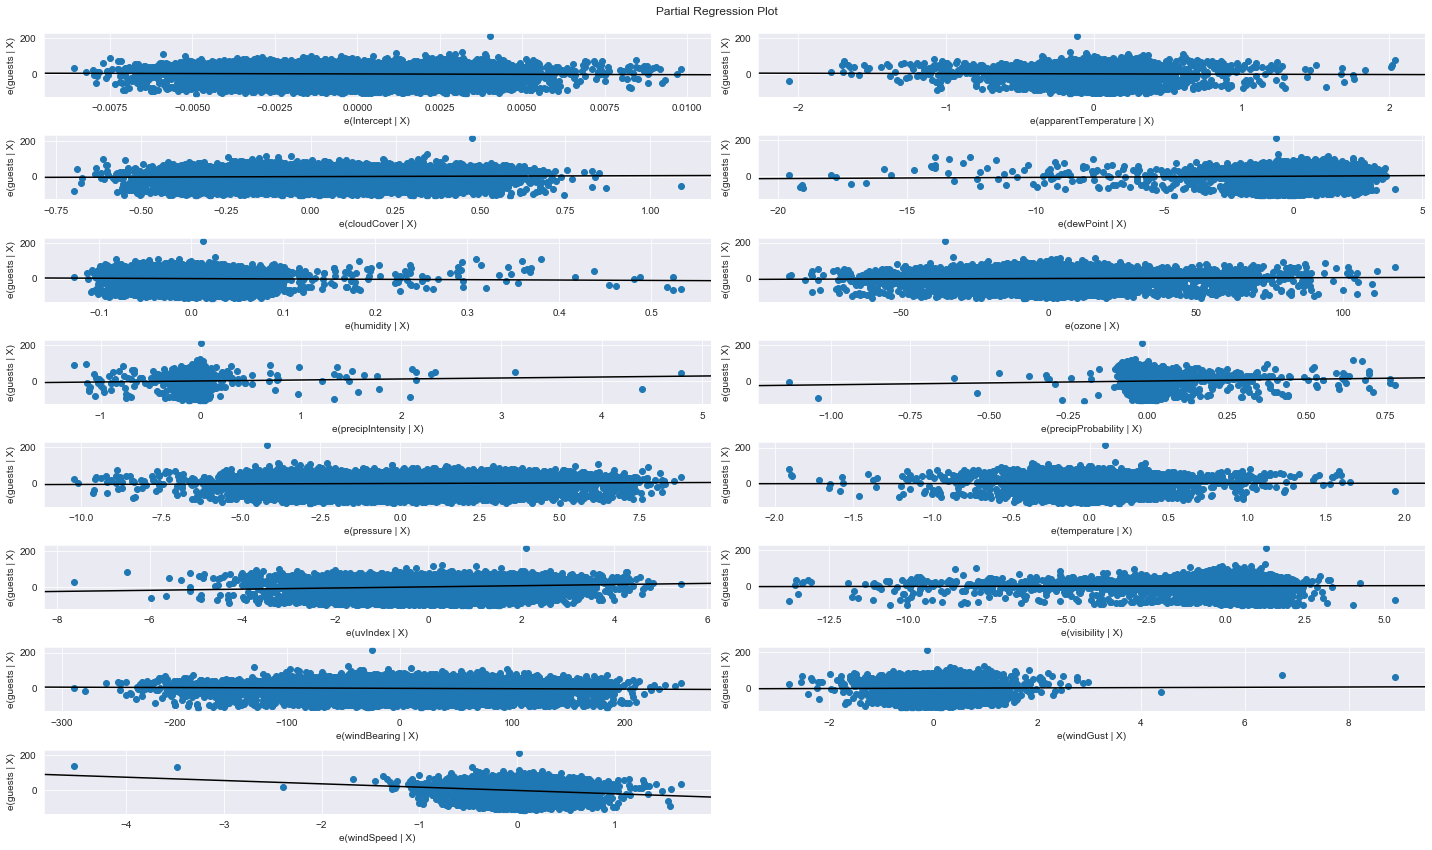

In [59]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(ols1, fig=fig)

In [60]:
f.columns

Index(['date_x', '_store_name', '_zip_code', '_city', 'region', '_state',
       'darksky_time_x', 'guests', 'sales', 'gross_sales', 'day', 'day_str',
       'merge', 'date_y', 'darksky_time_y', 'time_read', 'time',
       'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'ozone', 'precipIntensity', 'precipProbability', 'precipType',
       'pressure', 'summary', 'temperature', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'windSpeed', 'time_period', 'day_time'],
      dtype='object')

#### diagnostic analysis of a variable

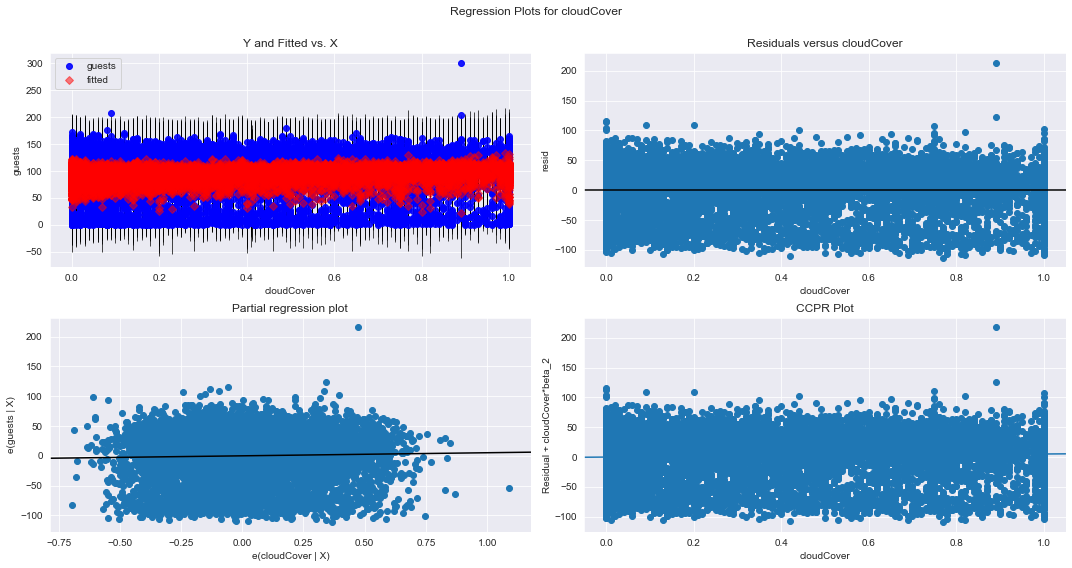

In [61]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(ols1, "cloudCover", fig=fig)

#### trend line and confidence interval

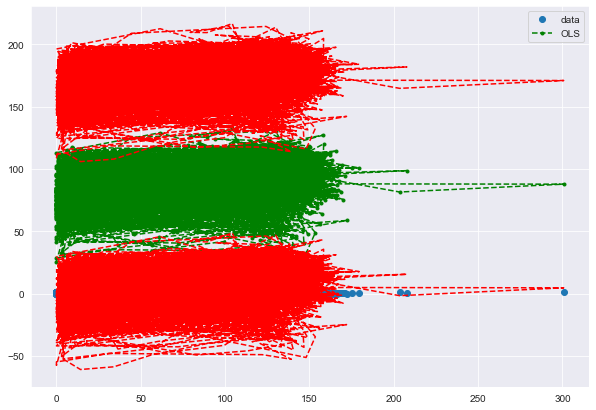

In [62]:
# predictor variable (x) and dependent variable (y)
x = f[['guests']]
y = f[['cloudCover']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(ols1)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, ols1.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');